In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

%matplotlib inline

sns.set(style="ticks")

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier



In [87]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Importing data sets

In [88]:
Back= pd.read_csv('Data_of_Attack_Back.csv')
Smurf= pd.read_csv('Data_of_Attack_Back_Smurf.csv')
Satan= pd.read_csv('Data_of_Attack_Back_Satan.csv')
Rootkit= pd.read_csv('Data_of_Attack_Back_RootKit.csv')
PortSweep= pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
Normal= pd.read_csv('Data_of_Attack_Back_Normal.csv')
NMap= pd.read_csv('Data_of_Attack_Back_NMap.csv')
Neptune= pd.read_csv('Data_of_Attack_Back_Neptune.csv')
GuessPassword= pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
FTP= pd.read_csv('Data_of_Attack_Back_FTPWrite.csv')
ButterOverflow= pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')



In [89]:
print(Back.shape)
print(Smurf.shape)
print(Satan.shape)
print(Rootkit.shape)
print(PortSweep.shape)
print(NMap.shape)
print(Neptune.shape)
print(GuessPassword.shape)
print(FTP.shape)
print(ButterOverflow.shape)


(968, 41)
(3007, 41)
(5019, 41)
(10, 41)
(2964, 41)
(1554, 41)
(227228, 41)
(53, 41)
(7, 41)
(30, 41)


In [90]:
print(Normal.shape)

(576710, 41)


In [91]:
Normal.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate'],
      dtype='object')

In [92]:
# Naming columns for FTP

FTP.columns

Index(['0.0026', ' 0', ' 0.07', ' 0.3', ' 0.00116', ' 0.00451', ' 0.4', ' 0.5',
       ' 0.6', ' 0.2', ' 0.7', ' 0.1', ' 0.8', ' 0.9', ' 0.10', ' 0.11',
       ' 0.1.1', ' 0.12', ' 0.1.2', ' 0.13', ' 0.14', ' 0.1.3', ' 0.001',
       ' 0.001.1', ' 0.15', ' 0.16', ' 0.17', ' 0.18', ' 0.1.4', ' 0.19',
       ' 0.20', ' 0.001.2', ' 0.001.3', ' 0.1.5', ' 0.21', ' 0.1.6', ' 0.22',
       ' 0.23', ' 0.24', ' 0.25', ' 0.26'],
      dtype='object')

In [93]:
columns= Normal.columns

In [94]:
FTP.columns = columns

In [95]:
FTP.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate'],
      dtype='object')

In [96]:
Back['attack']= 'Back'
Smurf['attack']=  'Smurf'
Satan['attack']= 'Satan'
Rootkit['attack']= 'Rootkit'
PortSweep['attack']= 'PortSweep'
NMap['attack']= 'NMap'
Neptune['attack']= 'Neptune'
GuessPassword['attack']= 'GuessPassword'
FTP['attack']= 'FTP'
ButterOverflow['attack']= 'ButterOverflow'
Normal['attack']= 'Normal'

In [97]:
dataframes= [Normal,Back,Smurf,Satan,Rootkit,PortSweep,Neptune,NMap,GuessPassword,FTP,ButterOverflow]
df = pd.concat(dataframes, axis=0)
df.reset_index(drop=True, inplace=True)

df.shape



(817550, 42)

In [98]:
df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [99]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,Normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0.0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,Normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0.0,0.0,0.0,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,Normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0.0,0.0,0.0,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,Normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0.0,0.0,0.0,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,Normal


In [100]:
print(df[' protocol_type'].value_counts())
print(df[' service'].value_counts())
print(df[' flag'].value_counts())

 protocol_type
0.00    776565
0.01     35402
0.02      5583
Name: count, dtype: int64
 service
0.00    462331
0.12    181678
0.01     53979
0.02     31806
0.14     21976
         ...  
0.38         5
0.64         2
0.65         2
0.67         2
0.63         1
Name: count, Length: 67, dtype: int64
 flag
0.00    570818
0.07    202685
0.05     38579
0.06      2541
0.08      2020
0.02       331
0.10       298
0.09       122
0.01        97
0.04        40
0.03        19
Name: count, dtype: int64


In [101]:
# Create dummy variable for nominal columns

columns= [' protocol_type', ' service', ' flag']

for col in columns:
    df= pd.get_dummies(df, columns=[col], drop_first=True)
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)



In [102]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_0.01,flag_0.02,flag_0.03,flag_0.04,flag_0.05,flag_0.06,flag_0.07,flag_0.08,flag_0.09,flag_0.1
0,0.0,0.00215,0.45076,0,0.0,0.0,0.0,0.0,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.00162,0.04528,0,0.0,0.0,0.0,0.0,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.00236,0.01228,0,0.0,0.0,0.0,0.0,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.00233,0.02032,0,0.0,0.0,0.0,0.0,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.00239,0.00486,0,0.0,0.0,0.0,0.0,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
print(df[' land'].value_counts())
print(df[' logged_in'].value_counts())
print(df[' root_shell'].value_counts())
print(df[' su_attempted'].value_counts())
print(df[' is_host_login'].value_counts()) 
print(df[' is_guest_login'].value_counts())

 land
0    817550
Name: count, dtype: int64
 logged_in
0.1    521694
0.0    295856
Name: count, dtype: int64
 root_shell
0.0    817299
0.1       251
Name: count, dtype: int64
 su_attempted
0.0    817495
0.2        36
0.1        19
Name: count, dtype: int64
 is_host_login
0.0    817549
0.1         1
Name: count, dtype: int64
 is_guest_login
0.0    815286
0.1      2264
Name: count, dtype: int64


In [104]:
# Encode binary variables

# Label encoding for binary columns

label_encoder = LabelEncoder()

columns1= [ ' logged_in',' root_shell',' is_host_login',' is_guest_login']

for col in columns1:
    df[col]= label_encoder.fit_transform(df[col])

print(df[' logged_in'].value_counts())
print(df[' root_shell'].value_counts())
print(df[' is_host_login'].value_counts())
print(df[' is_guest_login'].value_counts())



    

 logged_in
1    521694
0    295856
Name: count, dtype: int64
 root_shell
0    817299
1       251
Name: count, dtype: int64
 is_host_login
0    817549
1         1
Name: count, dtype: int64
 is_guest_login
0    815286
1      2264
Name: count, dtype: int64


In [105]:
#Drop single category column

df.drop(columns=[' land'], inplace= True)

In [106]:

# Convert su_attempted to binary: 0 for 0.0, 1 for other values
df['su_attempted_binary'] = df[' su_attempted'].apply(lambda x: 0 if x == 0.0 else 1)

print(df['su_attempted_binary'].value_counts())


su_attempted_binary
0    817495
1        55
Name: count, dtype: int64


In [107]:
df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_0.02,flag_0.03,flag_0.04,flag_0.05,flag_0.06,flag_0.07,flag_0.08,flag_0.09,flag_0.1,su_attempted_binary
0,0.0,0.00215,0.45076,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.00162,0.04528,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.00236,0.01228,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.00233,0.02032,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.00239,0.00486,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817550 entries, 0 to 817549
Columns: 117 entries, duration to su_attempted_binary
dtypes: float64(32), int32(78), int64(6), object(1)
memory usage: 486.5+ MB


In [109]:
df['attack'].value_counts()

attack
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
Back                 968
GuessPassword         53
ButterOverflow        30
Rootkit               10
FTP                    7
Name: count, dtype: int64

In [110]:
df.isnull().sum()

duration               0
 src_bytes             0
 dst_bytes             0
 wrong_fragment        0
 urgent                0
                      ..
 flag_0.07             0
 flag_0.08             0
 flag_0.09             0
 flag_0.1              0
su_attempted_binary    0
Length: 117, dtype: int64

In [111]:
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_0.02,flag_0.03,flag_0.04,flag_0.05,flag_0.06,flag_0.07,flag_0.08,flag_0.09,flag_0.1,su_attempted_binary
count,817550.000000,817550.000000,817550.000000,8.175500e+05,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,...,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000,817550.000000
mean,0.000877,0.004961,0.024862,3.669500e-07,0.000003,0.002456,0.000016,0.638119,0.000275,0.000307,...,0.000405,0.000023,0.000049,0.047189,0.003108,0.247918,0.002471,0.000149,0.000365,0.000067
std,0.026636,0.033235,0.066635,3.317906e-04,0.000805,0.041469,0.001618,0.480545,0.010338,0.017519,...,0.020117,0.004821,0.006995,0.212042,0.055663,0.431804,0.049646,0.012215,0.019089,0.008202
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.002170,0.003670,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.002990,0.019690,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000e-01,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Binomial Classification

In [112]:
# For binomial classification, create binary target variable

df1= df.copy()
df1['attack_class']= np.where(df.attack=='Normal',0,1)



In [113]:
df1['attack_class']

0         0
1         0
2         0
3         0
4         0
         ..
817545    1
817546    1
817547    1
817548    1
817549    1
Name: attack_class, Length: 817550, dtype: int32

In [114]:
df1['attack_class'].value_counts()

attack_class
0    576710
1    240840
Name: count, dtype: int64

In [115]:
df1.loc[:,['attack','attack_class']]

,attack,attack_class
0,Normal,0
1,Normal,0
2,Normal,0
3,Normal,0
4,Normal,0
...,...,...
817545,ButterOverflow,1
817546,ButterOverflow,1
817547,ButterOverflow,1
817548,ButterOverflow,1


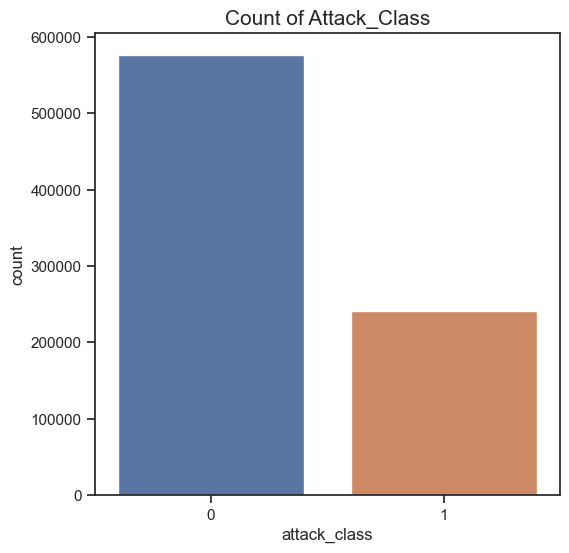

In [116]:
plt.figure(figsize=(6,6))
plt.title('Count of Attack_Class',fontsize=15)
sns.countplot(x='attack_class', data= df1)
plt.show()

In [117]:

df_new = df1.drop(columns = ['attack'],axis=1)
df_new

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_0.03,flag_0.04,flag_0.05,flag_0.06,flag_0.07,flag_0.08,flag_0.09,flag_0.1,su_attempted_binary,attack_class
0,0.0000,0.00215,0.45076,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0000,0.00162,0.04528,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0000,0.00236,0.01228,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0000,0.00233,0.02032,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0000,0.00239,0.00486,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817545,0.0321,0.01506,0.01887,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,1,0,0,0,0,0,1
817546,0.0045,0.02336,0.04201,0.0,0.0,0.3,0.0,1,0.1,1,...,0,0,0,0,0,0,0,0,0,1
817547,0.0176,0.01559,0.02732,0.0,0.0,0.3,0.0,1,0.4,1,...,0,0,0,0,0,0,0,0,0,1
817548,0.0061,0.02336,0.04194,0.0,0.0,0.3,0.0,1,0.1,1,...,0,0,0,0,0,0,0,0,0,1


In [118]:
### Correlation Matrix
corr = df_new.corr()
abs(corr['attack_class'].sort_values(ascending=False))

attack_class                 1.000000
 dst_host_srv_serror_rate    0.888495
 srv_error_rate              0.887414
 dst_host_serror_rate        0.887265
 flag_0.07                   0.887162
                               ...   
 logged_in                   0.852167
 dst_host_srv_count          0.854153
 dst_host_same_srv_rate      0.902923
 same_srv_rate               0.965914
 num_outbound_cmds                NaN
Name: attack_class, Length: 117, dtype: float64

In [119]:

X = df1.drop(['attack', 'attack_class'], axis=1)   # drop both multiclass and binary (keep only features)
y = df1['attack_class']   # binary target (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)



In [120]:
# Undersample Normal
# Let's say keep 100,000 Normal, keep all Attacks
undersample_dict = {0: 100000, 1: y_train.value_counts()[1]}  # attack keep as it is

rus = RandomUnderSampler(sampling_strategy=undersample_dict, random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)



In [121]:
#  Oversample Attack (SMOTE)

if y_train_under.value_counts()[1] < 100000:    # if still small
    smote = SMOTE(sampling_strategy={1: 100000}, random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_under, y_train_under)
else:
    X_train_balanced, y_train_balanced = X_train_under, y_train_under

print('Training data shape after balancing:', X_train_balanced.shape, y_train_balanced.shape)



Training data shape after balancing: (268588, 116) (268588,)


In [122]:
# Train Model: RandomForest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [123]:
# Predict
y_pred_rf = rf_model.predict(X_test)



In [124]:
# Evaluate
print("=== Random Forest (Binary Classification) ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))


=== Random Forest (Binary Classification) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173013
           1       1.00      1.00      1.00     72252

    accuracy                           1.00    245265
   macro avg       1.00      1.00      1.00    245265
weighted avg       1.00      1.00      1.00    245265

Confusion Matrix:
 [[172988     25]
 [    13  72239]]
ROC-AUC Score: 0.9998377881862472


In [125]:
# Train Model: XGBoost

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_balanced, y_train_balanced)

y_pred_xgb = xgb_model.predict(X_test)

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_balanced, y_train_balanced)


print("\n=== XGBoost (Binary Classification) ===")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))



=== XGBoost (Binary Classification) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173013
           1       1.00      1.00      1.00     72252

    accuracy                           1.00    245265
   macro avg       1.00      1.00      1.00    245265
weighted avg       1.00      1.00      1.00    245265

Confusion Matrix:
 [[172990     23]
 [    11  72241]]
ROC-AUC Score: 0.9998574085460626


## Multinomial classification

In [126]:
df2= df.copy()

In [127]:

df2['attack_class']=np.where(df2.attack=='Normal',0,
                               np.where(df2.attack=='Back', 1, np.where(df2.attack=='Neptune',2, np.where(df2.attack=='Smurf', 3, 
                            np.where(df2.attack=='Satan', 4, np.where(df2.attack=='Rootkit',5, np.where(df2.attack=='NMap', 6, 
                            np.where(df2.attack=='PortSweep',7, np.where(df2.attack=='GuessPassword', 8, np.where(df2.attack=='FTP',9,10))))))))))


In [128]:
df2['attack_class'].value_counts()

attack_class
0     576710
2     227228
4       5019
3       3007
7       2964
6       1554
1        968
8         53
10        30
5         10
9          7
Name: count, dtype: int64

In [129]:
df2.loc[:,['attack','attack_class']]

,attack,attack_class
0,Normal,0
1,Normal,0
2,Normal,0
3,Normal,0
4,Normal,0
...,...,...
817545,ButterOverflow,10
817546,ButterOverflow,10
817547,ButterOverflow,10
817548,ButterOverflow,10


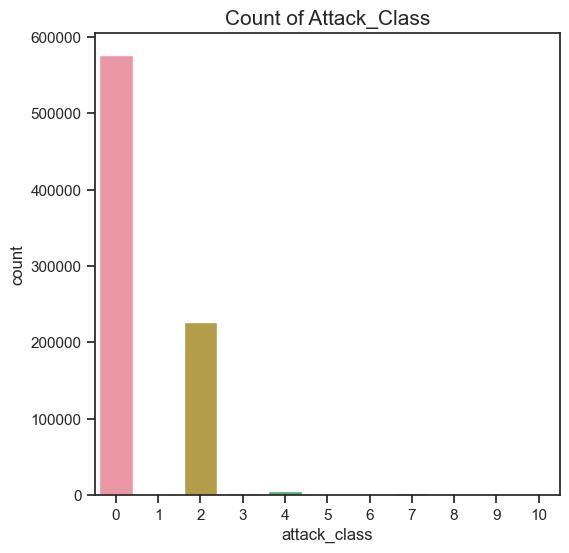

In [130]:
plt.figure(figsize=(6,6))
plt.title('Count of Attack_Class',fontsize=15)
sns.countplot(x='attack_class', data= df2)
plt.show()

In [131]:

df_new2 = df2.drop(columns = ['attack'],axis=1)
df_new2

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_0.03,flag_0.04,flag_0.05,flag_0.06,flag_0.07,flag_0.08,flag_0.09,flag_0.1,su_attempted_binary,attack_class
0,0.0000,0.00215,0.45076,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0000,0.00162,0.04528,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0000,0.00236,0.01228,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0000,0.00233,0.02032,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0000,0.00239,0.00486,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817545,0.0321,0.01506,0.01887,0.0,0.0,0.0,0.0,1,0.0,0,...,0,0,0,1,0,0,0,0,0,10
817546,0.0045,0.02336,0.04201,0.0,0.0,0.3,0.0,1,0.1,1,...,0,0,0,0,0,0,0,0,0,10
817547,0.0176,0.01559,0.02732,0.0,0.0,0.3,0.0,1,0.4,1,...,0,0,0,0,0,0,0,0,0,10
817548,0.0061,0.02336,0.04194,0.0,0.0,0.3,0.0,1,0.1,1,...,0,0,0,0,0,0,0,0,0,10


In [132]:
### Correlation Matrix
corr = df_new2.corr()
abs(corr['attack_class'].sort_values(ascending=False))

attack_class                 1.000000
 dst_host_srv_serror_rate    0.760150
 srv_error_rate              0.759107
 count                       0.758914
 serror_rate                 0.755504
                               ...   
 dst_host_srv_count          0.787329
 logged_in                   0.793765
 dst_host_same_srv_rate      0.825662
 same_srv_rate               0.853992
 num_outbound_cmds                NaN
Name: attack_class, Length: 117, dtype: float64

## Train test split

In [133]:

X1 = df2.drop(['attack', 'attack_class'], axis=1)   # drop both multiclass and binary (keep only features)
y1 = df2['attack_class']   # binary target (0 or 1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, stratify=y, test_size=0.3, random_state=42)



In [134]:
print(X_train1.shape)
print(X_test1.shape)

(572285, 116)
(245265, 116)


In [135]:
y_train1

7103      0
291003    0
356604    0
223284    0
179228    0
         ..
401551    0
803585    2
246872    0
411441    0
482645    0
Name: attack_class, Length: 572285, dtype: int32

In [136]:
 # Undersample Normal (0) and Neptune (2)
from collections import Counter


undersample_strategy = Counter(y_train1)
undersample_strategy[0] = min(100000, undersample_strategy[0])  # Normal
undersample_strategy[2] = min(20000, undersample_strategy[2])   # Neptune

In [137]:
rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train1, y_train1)
print("After undersampling:", Counter(y_train_under))

After undersampling: Counter({0: 100000, 2: 20000, 4: 3513, 3: 2106, 7: 2062, 6: 1086, 1: 711, 8: 36, 10: 20, 5: 8, 9: 6})


In [138]:
# SMOTE for rare classes- Oversample rare classes

desired_size = 20000
current_dist = Counter(y_train_under)
smote_strategy = {cls: desired_size for cls, count in current_dist.items() if count < desired_size}

sm = SMOTE(sampling_strategy=smote_strategy,k_neighbors=2, random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_under, y_train_under)
print("After SMOTE:", Counter(y_train_bal))

After SMOTE: Counter({0: 100000, 1: 20000, 2: 20000, 3: 20000, 4: 20000, 5: 20000, 6: 20000, 7: 20000, 8: 20000, 9: 20000, 10: 20000})


In [139]:
# Train RandomForest

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_bal, y_train_bal)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [140]:
# Predict

y_pred1  = rf_model.predict(X_test1)

In [141]:
#Evaluate

print("\n=== Random Forest Classification Report ===")
print(classification_report(y_test1, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred1))


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173013
           1       1.00      1.00      1.00       257
           2       1.00      1.00      1.00     68188
           3       1.00      1.00      1.00       901
           4       1.00      0.99      1.00      1506
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00       468
           7       1.00      1.00      1.00       902
           8       1.00      1.00      1.00        17
           9       0.00      0.00      0.00         1
          10       1.00      0.60      0.75        10

    accuracy                           1.00    245265
   macro avg       0.82      0.78      0.79    245265
weighted avg       1.00      1.00      1.00    245265

Confusion Matrix:
 [[172998      0      1      0      6      2      2      3      0      1
       0]
 [     0    257      0      0      0     

In [142]:
print(metrics.accuracy_score( y_test1, y_pred1 ))

0.9998491427639492


In [143]:
# Train Model: XGBoost

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_bal, y_train_bal)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [144]:
y_pred_xgb = xgb_model.predict(X_test1)




In [145]:
tree_train_pred = pd.DataFrame( { 'actual':  y_test1,
                            'predicted': y_pred_xgb  } )
tree_train_pred

,actual,predicted
673789,2,2
405915,0,0
270729,0,0
110702,0,0
508303,0,0
...,...,...
241348,0,0
387298,0,0
634648,2,2
51865,0,0


In [151]:
y_pred_proba = xgb_model.predict_proba(X_test1)

roc_auc = roc_auc_score(y_test1, y_pred_proba, multi_class='ovr', average='macro')

print("ROC-AUC Score (OVR):", roc_auc)

print("\n=== XGBoost (Multiclass Classification) ===")
print(classification_report(y_test1, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred_xgb))

ROC-AUC Score (OVR): 0.9998496413349699

=== XGBoost (Multiclass Classification) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173013
           1       1.00      1.00      1.00       257
           2       1.00      1.00      1.00     68188
           3       1.00      1.00      1.00       901
           4       1.00      1.00      1.00      1506
           5       0.08      0.50      0.13         2
           6       0.99      1.00      1.00       468
           7       1.00      1.00      1.00       902
           8       0.94      1.00      0.97        17
           9       0.00      0.00      0.00         1
          10       0.69      0.90      0.78        10

    accuracy                           1.00    245265
   macro avg       0.79      0.85      0.81    245265
weighted avg       1.00      1.00      1.00    245265

Confusion Matrix:
 [[172989      1      0      0      1     10      3      3      1      1
       4]
 

In [147]:
print(metrics.accuracy_score( y_test1, y_pred_xgb ))

0.9998328338735654
